In this implementation:
- Missing values are treated as a separate category i.e. we do not replace missing values with NaN.
- Use 95:5 train to validation set ratio.


In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *

In [3]:
# Set printing options. 
# These options determine the way floating point numbers, arrays and
# other NumPy objects are displayed.
np.set_printoptions(threshold=50, edgeitems=20)

### Set data path

In [4]:
PATH = 'data/porto-seguro/'

### Read csv data into dataframe

In [5]:
train_data_df = pd.read_csv(f'{PATH}train/train.csv')
test_data_df = pd.read_csv(f'{PATH}test/test.csv')

### Drop `id` columns

In [6]:
train_data_df.drop(labels='id', axis=1, inplace=True)

In [7]:
test_data_df.drop(labels='id', axis=1, inplace=True)

### List of column names

In [8]:
all_var = [var for var in train_data_df.columns]

In [9]:
all_var

['target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

### Create list of categorical and continuous variables

In [10]:
cat_vars = [var for var in train_data_df.columns if var.endswith('cat')]
bin_vars = [var for var in train_data_df.columns if var.endswith('bin')]
ind_vars = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15']
reg_vars = ['ps_reg_01', 'ps_reg_02']
car_vars = ['ps_car_11', 'ps_car_12', 'ps_car_15']
calc_vars = ['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 
             'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
other_vars = ['ps_reg_03', 'ps_car_14', 'ps_car_13',' id']
cat_vars = cat_vars + bin_vars + ind_vars + reg_vars + car_vars + calc_vars #+ other_vars
cat_vars

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_car_11',
 'ps_car_12',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [11]:
cont_vars = [var for var in train_data_df.columns if var not in cat_vars]
cont_vars

['target', 'ps_reg_03', 'ps_car_13', 'ps_car_14']

In [12]:
for var in cat_vars: 
    train_data_df[var] = train_data_df[var].astype('category').cat.as_ordered()
    test_data_df[var] = test_data_df[var].astype('category').cat.as_ordered()

In [13]:
for var in cont_vars:
    train_data_df[var] = train_data_df[var].astype('float32')

In [14]:
cont_vars

['target', 'ps_reg_03', 'ps_car_13', 'ps_car_14']

In [15]:
for idx, val in enumerate(cont_vars):
    if cont_vars[idx] == 'target':
        del cont_vars[idx]

In [16]:
cont_vars

['ps_reg_03', 'ps_car_13', 'ps_car_14']

In [17]:
for var in cont_vars:
    test_data_df[var] = test_data_df[var].astype('float32')

In [18]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
target            595212 non-null float32
ps_ind_01         595212 non-null category
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null category
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null category
ps_ind_15         595212 non-null category
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null category
ps_reg_02         595212 non-n

### Display training data sample

In [19]:
train_data_df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0.0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0.0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0.0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0.0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


### Display test data sample

In [20]:
test_data_df.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


### Create validation set indices

In [21]:
# Tune VAL_PCT hyperparameter
# Tune MAX_FOLDS hyperparameter

#VAL_FRAC = 0.1
#MAX_FOLDS = 5
TRAIN_FRAC = 0.95

num_obs = train_data_df.shape[0]
train_size = int(TRAIN_FRAC * num_obs)
val_idx = list(range(train_size, num_obs))
# cv_dict = {f'ids_fold_{num_fold}': get_cv_idxs(n=num_obs, cv_idx=num_fold, val_pct=VAL_FRAC) for num_fold in range(MAX_FOLDS)}


In [22]:
len(val_idx)

29761

### Set response variable

In [23]:
TRN_TARGET_VAR = "target"

In [24]:
test_obs = test_data_df.shape[0]
test_obs

892816

In [25]:
test_y = np.zeros(shape=[test_obs, 1])
test_y.shape

(892816, 1)

In [26]:
TEST_TARGET_VAR = "pred"

In [27]:
test_data_df[TEST_TARGET_VAR] = test_y

### Train set, response variable, feature scaling

In [28]:
train, target, trn_nas, trn_map = proc_df(df=train_data_df, y_fld=TRN_TARGET_VAR, do_scale=True)

In [29]:
test, preds, test_nas, test_map = proc_df(df=test_data_df, y_fld=TEST_TARGET_VAR, do_scale=True, na_dict=trn_nas, mapper=trn_map)

### Drop `id` field

In [30]:
train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,3,3,6,3,2,1,2,1,1,1,...,10,2,6,9,1,2,2,1,1,2
1,2,2,8,2,2,1,1,2,1,1,...,4,2,2,10,1,2,2,1,2,1
2,6,5,10,3,2,1,1,2,1,1,...,5,3,8,8,1,2,2,1,2,1
3,1,2,3,2,2,2,1,1,1,1,...,3,3,5,10,1,1,1,1,1,1
4,1,3,1,3,2,2,1,1,1,1,...,4,2,2,4,1,1,1,2,2,1


In [31]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1,2,9,3,2,1,2,1,1,1,...,2,2,2,13,1,2,2,1,1,2
1,5,3,6,3,2,1,1,1,2,1,...,3,1,4,11,1,1,2,2,1,2
2,6,2,4,2,2,1,1,1,2,1,...,5,1,3,5,1,1,1,1,1,1
3,1,2,7,2,2,2,1,1,1,1,...,6,2,1,6,2,1,2,1,1,1
4,6,2,8,2,2,1,1,1,2,1,...,5,1,1,5,1,2,2,1,1,2


### Convert categorical values to type `category`

In [32]:
for var in cat_vars: 
    train[var] = train[var].astype('category').cat.as_ordered()
    test[var] = test[var].astype('category').cat.as_ordered()

### Convert remaining variables to `float32`

In [33]:
for var in cont_vars:
    train[var] = train[var].astype('float32')
    test[var] = test[var].astype('float32')

target.astype('float32')
preds.astype('float32')

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       ...,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 57 columns):
ps_ind_01         595212 non-null category
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null category
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null category
ps_ind_15         595212 non-null category
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null category
ps_reg_02         595212 non-null category
ps_reg_03         595212 non-

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 57 columns):
ps_ind_01         892816 non-null category
ps_ind_02_cat     892816 non-null category
ps_ind_03         892816 non-null category
ps_ind_04_cat     892816 non-null category
ps_ind_05_cat     892816 non-null category
ps_ind_06_bin     892816 non-null category
ps_ind_07_bin     892816 non-null category
ps_ind_08_bin     892816 non-null category
ps_ind_09_bin     892816 non-null category
ps_ind_10_bin     892816 non-null category
ps_ind_11_bin     892816 non-null category
ps_ind_12_bin     892816 non-null category
ps_ind_13_bin     892816 non-null category
ps_ind_14         892816 non-null category
ps_ind_15         892816 non-null category
ps_ind_16_bin     892816 non-null category
ps_ind_17_bin     892816 non-null category
ps_ind_18_bin     892816 non-null category
ps_reg_01         892816 non-null category
ps_reg_02         892816 non-null category
ps_reg_03         892816 non-

### Gini metric

In [36]:
from sklearn.metrics import roc_auc_score

inv_log = lambda x : np.exp(x)

def gini_metric(preds, targs):
    preds = inv_log(preds)
    auc = roc_auc_score(y_true=targs, y_score=preds)
    return 2 * auc - 1

### Create embeddings

In [37]:
cat_sz = [(c, len(train[c].cat.categories) + 1) for c in cat_vars]

In [38]:
cat_sz

[('ps_ind_02_cat', 6),
 ('ps_ind_04_cat', 4),
 ('ps_ind_05_cat', 9),
 ('ps_car_01_cat', 14),
 ('ps_car_02_cat', 4),
 ('ps_car_03_cat', 4),
 ('ps_car_04_cat', 11),
 ('ps_car_05_cat', 4),
 ('ps_car_06_cat', 19),
 ('ps_car_07_cat', 4),
 ('ps_car_08_cat', 3),
 ('ps_car_09_cat', 7),
 ('ps_car_10_cat', 4),
 ('ps_car_11_cat', 105),
 ('ps_ind_06_bin', 3),
 ('ps_ind_07_bin', 3),
 ('ps_ind_08_bin', 3),
 ('ps_ind_09_bin', 3),
 ('ps_ind_10_bin', 3),
 ('ps_ind_11_bin', 3),
 ('ps_ind_12_bin', 3),
 ('ps_ind_13_bin', 3),
 ('ps_ind_16_bin', 3),
 ('ps_ind_17_bin', 3),
 ('ps_ind_18_bin', 3),
 ('ps_calc_15_bin', 3),
 ('ps_calc_16_bin', 3),
 ('ps_calc_17_bin', 3),
 ('ps_calc_18_bin', 3),
 ('ps_calc_19_bin', 3),
 ('ps_calc_20_bin', 3),
 ('ps_ind_01', 9),
 ('ps_ind_03', 13),
 ('ps_ind_14', 6),
 ('ps_ind_15', 15),
 ('ps_reg_01', 11),
 ('ps_reg_02', 20),
 ('ps_car_11', 6),
 ('ps_car_12', 185),
 ('ps_car_15', 16),
 ('ps_calc_01', 11),
 ('ps_calc_02', 11),
 ('ps_calc_03', 11),
 ('ps_calc_04', 7),
 ('ps_calc_05',

In [39]:
#emb_szs = [(c, min(100, (c + 1) // 2)) for _, c in cat_sz]
emb_szs = [(c, min(100, (2 * c + 1))) for _, c in cat_sz]

In [40]:
emb_szs

[(6, 13),
 (4, 9),
 (9, 19),
 (14, 29),
 (4, 9),
 (4, 9),
 (11, 23),
 (4, 9),
 (19, 39),
 (4, 9),
 (3, 7),
 (7, 15),
 (4, 9),
 (105, 100),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (9, 19),
 (13, 27),
 (6, 13),
 (15, 31),
 (11, 23),
 (20, 41),
 (6, 13),
 (185, 100),
 (16, 33),
 (11, 23),
 (11, 23),
 (11, 23),
 (7, 15),
 (8, 17),
 (12, 25),
 (11, 23),
 (12, 25),
 (9, 19),
 (27, 55),
 (21, 43),
 (12, 25),
 (15, 31),
 (25, 51)]

### Model Architecture / Hyperparameters

In [41]:
layer_1 = 1024
layer_2 = 512
layer_3 = 256
batch_size = 256
embed_dropout = 0.2
layer_dropout = 0.3

In [42]:
# Create TRAINING model
md = ColumnarModelData.from_data_frame(path=PATH, 
                                       val_idxs=val_idx,
                                       df=train, 
                                       y=target, 
                                       cat_flds=cat_vars, 
                                       bs=batch_size, 
                                       test_df=test)

### Model learner

In [43]:
# Use all categorical variables
m = md.get_learner(emb_szs=emb_szs, 
                   n_cont=(len(train.columns) - len(cat_vars)),
                   emb_drop=embed_dropout, 
                   out_sz=1, 
                   szs=[layer_1, layer_2], 
                   drops=[layer_dropout, layer_dropout], 
                   y_range=None)


In [44]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 54%|█████▍    | 1191/2209 [00:28<00:24, 42.36it/s, loss=0.191] 

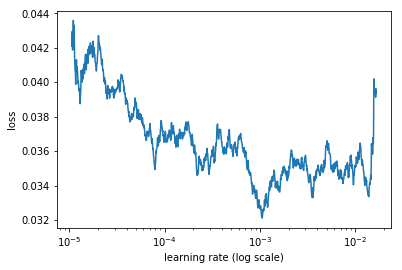

In [45]:
m.sched.plot()

In [46]:
lr = 0.0001

In [47]:
m.fit(lrs=lr, n_cycle=4, metrics=[accuracy, gini_metric])

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))


  1%|          | 17/2209 [00:01<03:16, 11.16it/s, loss=0.0424] 

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError:

[ 0.       0.03648  0.03462  0.96389  0.23236]                  
[ 1.       0.03462  0.03459  0.96389  0.26789]                  
[ 2.       0.03484  0.03451  0.96389  0.26022]                  
[ 3.       0.03615  0.03449  0.96389  0.25631]                  



In [48]:
m.fit(lrs=lr, n_cycle=2, cycle_len=2, metrics=[accuracy, gini_metric])

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

[ 0.       0.03456  0.03453  0.96389  0.26241]                  
[ 1.       0.03577  0.03453  0.96389  0.26199]                  
[ 2.       0.03474  0.03457  0.96389  0.25228]                  
[ 3.       0.0349   0.03455  0.96389  0.25268]                  



In [49]:
m.predict()

array([[ 0.0386 ],
       [ 0.11266],
       [ 0.01085],
       [ 0.02607],
       [ 0.02101],
       [ 0.02961],
       [ 0.03421],
       [ 0.02931],
       [ 0.02075],
       [ 0.02015],
       [ 0.01809],
       [ 0.016  ],
       [ 0.03364],
       [ 0.03523],
       [ 0.04057],
       [ 0.08983],
       [ 0.0284 ],
       [ 0.03242],
       [ 0.03407],
       [ 0.01419],
       ..., 
       [ 0.02892],
       [ 0.07193],
       [ 0.0204 ],
       [ 0.05167],
       [ 0.04129],
       [ 0.03794],
       [ 0.02928],
       [ 0.01543],
       [ 0.0181 ],
       [ 0.02197],
       [ 0.04295],
       [ 0.03652],
       [ 0.01843],
       [ 0.02645],
       [ 0.02415],
       [ 0.0228 ],
       [ 0.05838],
       [ 0.01662],
       [ 0.03163],
       [ 0.01298]], dtype=float32)

In [50]:
target

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
       ...,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [51]:
#m.save("model_1")

In [52]:
#m.load("model_1")

In [53]:
x, y = m.predict_with_targs()

In [54]:
gini_metric(x, y)

0.25309809589360666

### Test set predictions

In [55]:
pred_test = m.predict(is_test=True)

RuntimeError: cuda runtime error (59) : device-side assert triggered at /opt/conda/conda-bld/pytorch_1503965122592/work/torch/lib/THC/THCTensorCopy.cu:100